<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

**Цель:** защита данных клиентов страховой компании «Хоть потоп».

**Задача:** разработка метода преобразования данных, для того, чтобы по ним было сложно восстановить персональную информацию. 

**Этапы работы:** загрузка и анализа данных/умножение матриц и качество линейной регрессии/алгоритм преобразования данных/проверка качества алгоритма.

**Описание данных:**
Работа с файлом - '/datasets/insurance.csv', где
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.


## Загрузка данных

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
try:
    data = pd.read_csv('insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(data.head(10))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Итак, у нас 5000 строк, средняя зарплата - 39,9 тыс. руб.; средний возраст - 30,9. Признаки обозначены:
- Пол, Возраст, Зарплата, Члены, семьи.
- Целевой признак: количество страховых выплат.
Для задачи предобработка не требуется.

<AxesSubplot:>

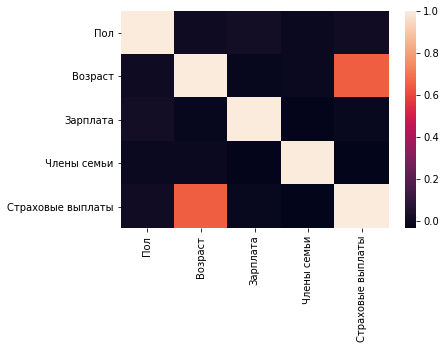

In [5]:
corr = data.corr()
sns.heatmap(corr)

In [6]:
data['Возраст'].corr(data['Страховые выплаты'])

0.6510300979467256

Да, достаточно высокая, но приемлемая для нашей задачи.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Признаки умножают на обратимую матрицу. Качество линейной регрессии не изменится**. Изменится вектор весов линейной регрессии для новых признаков. Любую матрицу A умножить на единичную (или наоборот), получится эта же матрица A: AE = EA = A.
Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки.

Итак, обратная для квадратной матрицы A — матрица A с верхним индексом -1. Умножение может быть в любом порядке: 
$$
AA^{-1} = A^{-1}A = E
$$

Учтем свойства (А и B квадратные):
$$
(АВ)^{T} = В^T A^T
$$

$$
(АВ)^{-1} = В^{-1} А^{-1}
$$

Возьмем а1=a, a1, как предсказание, с матрицей признаков X, умноженных на матрицу, на которую умножаются признаки

$$
a = wX
$$

$$
а1 = w1X1
$$

$$
X1 = XР
$$

Для предсказания для матрицы XР:
$$
a1 = (XР)((XР)^{T}XР)^{-1}(XР)^{T} y)
$$

Преобразуем с учетом свойств:

$$
a1 = (XР)(Р^{T} X^{T}XР)^{-1} (Р^{T} X^{T} y)
$$

и

$$
a1 = XР(X^{T}XР)^{-1} (Р^{T})^{-1} (Р^{T} X^{T} y) = XРР^{-1}(X^{T} X)^{-1}(Р^{T})^{-1}Р^{T} X^{T} y
$$

Так как, 

$$
AA^{-1} = A^{-1}A = E
$$

Преобразуем уравнение:

$$
a1 = XE(X^{T} X)^{-1} EX^{T} y = X(X^{T} X)^{-1} X^{T} y
$$

Если 

$$
a = X(X^{T} X)^{-1} X^{T} y
$$

Значит, a1 = a, w1 = w.

Таким образом, если изменить исходные данные методом умножения признаков на обратимую матрицу, не изменяя значений целевого признака, качество предсказания модели не изменится.

Таким же образом, заменим новой матрицей признаков X1 - произведение старой X на матрицу P. Тогда получается:

$$
X1 = XP
$$

$$
w_P = (X1^T X1)^{-1} X1^T y
$$

Перегруппируем, раскроем скобки и получим формулу для $w_P$:

$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

Получили формулу для $w$, подставим $w$ и $w_p$, чтобы вычислить предсказания этой же $a1$

$$
w_P = P^{-1} w
$$

$$
а1 = Х1
$$

$$
w_P = XP P^{-1} 
$$

$$
w = Xw
$$

$$
a1 = a
$$

Так и получается, предсказания $а1$ для матрицы признаков, которые умножены на обратимую матрицу $P$ равны предсказаниям $a$.

В данном случае, параметры линейной регрессии в исходной задаче $w$ и $w_p$ в преобразованной  связаны следующим образом:

$$
w_P = P^{-1} w
$$

## Алгоритм преобразования

**Алгоритм**
Необходимо умножить матрицу признаков на матрицу шифрования так как при умножении количество столбцов матрицы A должно быть равно количеству строк матрицы, полученная матрица будет иметь количество строк матрицы A и количество столбцов матрицы B. Поэтому размер матрицы щифрования на которую умножают равен 4х4

Итак, если сгенерировать случайную матрицу функцией numpy.random.normal(), вероятность получить необратимую матрицу близка к нулю.

**Обоснование**

In [7]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features.shape, target.shape

((5000, 4), (5000,))

In [8]:
# Создадим обратимую квадратную матрицу размерностью столбцов features
state = np.random.RandomState(12345)
matrix_inv=np.random.normal(size=(features.shape[1],features.shape[1]))

In [9]:
np.round(matrix_inv @ np.linalg.inv(matrix_inv))

array([[ 1.,  0.,  0., -0.],
       [-0.,  1., -0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

Да, матрица является единичной, рандомная матрица matrix_inv обратима.

In [11]:
features_inv=features @ matrix_inv
features_inv

,0,1,2,3
0,32218.859770,-14467.829331,4569.425176,49082.903543
1,24659.291129,-11092.406648,3515.940777,37581.198519
2,13620.774901,-6133.032236,1947.429938,20763.215175
3,27112.202456,-12154.714381,3826.853320,41286.962033
4,16941.940485,-7617.170523,2411.440007,25817.447125
...,...,...,...,...
4995,23194.108068,-10410.706683,3286.113810,35330.155682
4996,34054.413620,-15280.627468,4818.635973,51869.853127
4997,22036.152838,-9882.028608,3113.538673,33559.275108
4998,21251.815630,-9530.650329,3003.971704,32365.124502


Размер матрицы признаков и кодированных признаков совпадает.

## Проверка алгоритма

In [12]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)

print('R2:', r2_score(target, predictions))

R2: 0.4249455028666801


На тестовой

In [13]:
model = LinearRegression()
model.fit(features_inv, target)
predictions = model.predict(features_inv)

print('R2:', r2_score(target, predictions))

R2: 0.42494550286666877


In [14]:
target.shape
features_inv.shape

(5000, 4)

Качество моделей при помощи умножения на обратимую матрицу со случайными числами не изменяется.

**Общий вывод:**
Нам было необходимо для защиты данные клиентов страховой компании «Хоть потоп» разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

Для этого были загружены и изучены данные файла, с основной информацией из 5 столбцов (признаков) с 5000-ми строк. Признаки обозначены:
- Пол, Возраст, Зарплата, Члены, семьи.
- Целевой признак: количество страховых выплат.

Средняя зарплата - 39,9 тыс. руб.; средний возраст - 30,9. Для правильной работы, проведена проверка на корреляцию. Высокая Мультиколлениарность выявлена в признаках возраста и кол-ве страховых выплат. Она составила - 0,65. Для задачи приемлема.  
Предобработка данных не потребовалась.

Далее для задачи обучения была преообазована формула и сделан вывод об умножении матриц и изменении качества линейной регрессии. Так как признаки умножают на обратимую матрицу - качество линейной регрессии не меняется (R2 по итогу - 0.4249455028666801 и 0.4249455028666802). 
Параметры линейной регрессии в исходной задаче и в преобразованной связаны между собой алгоритмом преобразования признаков, по результату работы которого предсказание вычисляется методом умножения признаков исходных данных на вектор по длине равный ширине таблицы признаков, который в свою очередь умножается на целевые признаки. В данном случае, параметры линейной регрессии в исходной задаче $w$ и $w_p$ в преобразованной  связаны следующим образом: $w_P = P^{-1} w$

Был запрограммирован алгоритм предобразования. Для этого матрица признаков была умножена на матрицу шифрования Размер матрицы щифрования - 4х4. Была сгенерирована случайная матрица функцией numpy.random.normal() и проверена на обратимость функцией np.linalg.inv. В итоге работа по преобразованию данных корректна, размер матрицы признаков и кодированных признаков совпадает.

В итоге было проверено отличается ли качество линейной регрессии из sklearn до и после преобразования.  Измерен показатель r2 исходных данных и на данных умноженных на обратимую матрицу размером разным числу признаков. При сравнении качества предсказаний с моделью r2 не поменяется. Результат -  алгоритм работает. Восстановить персональную информацию будет сложно, с защитой персональной информации он справится.